# Question 5

## (a)
LDAs work best on test data because the model may overfit the linearity on the Bayes decision boundary. QDAs work best on training data because the model is highly flexible which yields a closer t. 

## (b)

QDAs work best on both training and test sets when the Bayes decision boundary is nonlinear. It doesn't matter whether test or training data is being used because each class will have its own covariance matrix. LDAs have linear bounds with lower variance while QDAs have nonlinear bounds and higher variance. 

## (c)

As n increases, the test prediction accuracy of QDA relative to LDA will increase because the significance of variance (error) decreases. 

## (d)

This is false because the QDA will overfit the data given its high variance and the flexibility of the model.

# Question 7

## (a)

$\hat{X_Y}=10, \hat{X_N}=0$

$ \hat{\sigma^2}=36 $

$ P(Y)=.8, P(N)=.2


$P(X=4 | Y)=\frac{1}{\sigma\sqrt{2\pi}}e^\frac{-(X-\hat{X})^2}{2\sigma^2}$
$=\frac{1}{6\sqrt{2\pi}}e^\frac{-(4-10)^2}{2*36}=0.0403$

$P(X=4 | N)=\frac{1}{\sigma\sqrt{2\pi}}e^\frac{-(X)^2}{2\sigma^2}$
$=\frac{1}{6\sqrt{2\pi}}e^\frac{-(4)^2}{2*36}=0.0532$

$P(X=4)=P(X=4 | Y)P(Y)+P(X=4 | N)P(N)$
$=0.0403*0.8+0.0532*.2=0.0429$

$P(Y | X=4)=\frac{P(Y)P(X=4 | Y)}{P(X=4)}$
$=\frac{.0403*.8}{0.0429}=.7515*100\% =75.2\% $

# Question 16

In [70]:
from dataclasses import dataclass
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.pyplot as plt

import seaborn as sns
Boston = pd.read_csv('Boston.csv')
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [71]:
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


> Predict whether a given suburb has a crime rate above or below the median.

- Logistic regression
- LDA 
- Naive Bayes
- KNN


array([[<Axes: xlabel='crim', ylabel='crim'>,
        <Axes: xlabel='zn', ylabel='crim'>,
        <Axes: xlabel='indus', ylabel='crim'>,
        <Axes: xlabel='nox', ylabel='crim'>,
        <Axes: xlabel='rm', ylabel='crim'>,
        <Axes: xlabel='age', ylabel='crim'>,
        <Axes: xlabel='dis', ylabel='crim'>,
        <Axes: xlabel='rad', ylabel='crim'>,
        <Axes: xlabel='tax', ylabel='crim'>,
        <Axes: xlabel='ptratio', ylabel='crim'>,
        <Axes: xlabel='lstat', ylabel='crim'>,
        <Axes: xlabel='medv', ylabel='crim'>],
       [<Axes: xlabel='crim', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='indus', ylabel='zn'>,
        <Axes: xlabel='nox', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='age', ylabel='zn'>,
        <Axes: xlabel='dis', ylabel='zn'>,
        <Axes: xlabel='rad', ylabel='zn'>,
        <Axes: xlabel='tax', ylabel='zn'>,
        <Axes: xlabel='ptratio', ylabel='zn'>,
        <Axes: x

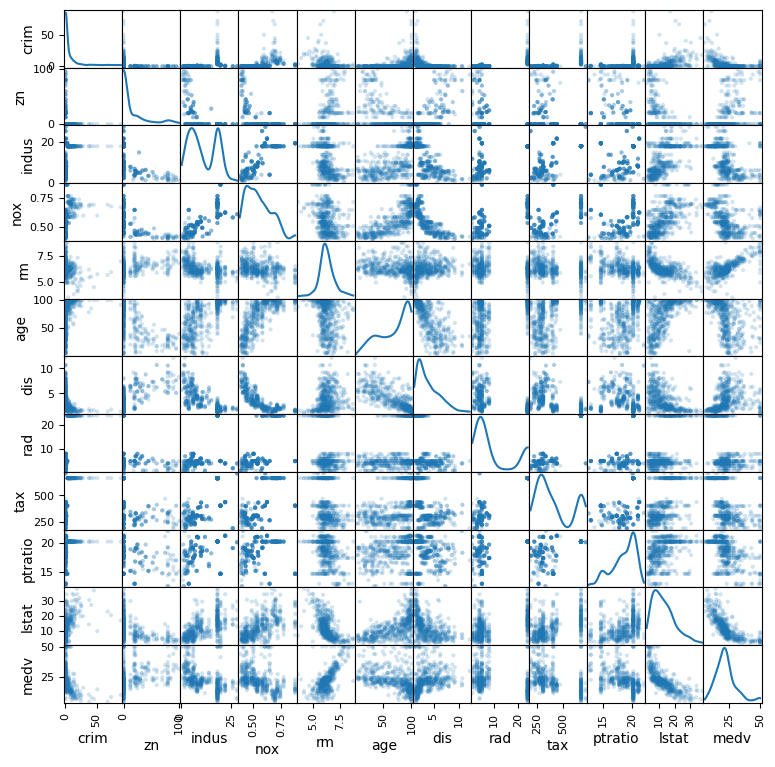

In [72]:
Boston.drop(columns=Boston.columns[0], axis=1, inplace=True)
df = pd.DataFrame(data=Boston)
pd.plotting.scatter_matrix(df.drop('chas', axis=1, inplace=False), alpha=0.2, figsize=(9,9), diagonal='kde')

In [73]:
# (df[['chas']] == 0).sum()
df[['chas']].info()
# chas caterigorical -> 35 nonzero val

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   chas    506 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB


In [74]:
# Convert crim to binary category
## 1 if crime rate is above the median 
## 0 if crime rate is below the median 

df['crim'] = np.where(df['crim'] >= df['crim'].median(), 1, 0)
((df['crim'] == 0).sum() == (df['crim'] == 1).sum() and (df['crim'] == 0).sum() != 0)

np.True_

In [75]:
@dataclass
class T:
    train: pd.DataFrame
    test: pd.DataFrame

""""
@TODO expand T to 
    X_train, y_train, 
    X_test, y_test
    mean_squared_error (MSE)
    prediction
    cross_validation
    references given a classification model (LDA, naive Bayes, KNN models) 
"""
def sample(df):
    sample = df.sample(frac=1, random_state=42).reset_index(drop=True)
    size = int(len(sample) * .8)
    train = sample[:size] # 80%
    test = sample[size:] # 20%
    
    return T(train=train, test=test)

In [76]:
data = sample(df)
data

T(train=     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0       0   0.0   4.05     0  0.510  6.416  84.1  2.6463    5  296     16.6   
1       0  40.0   6.41     1  0.447  6.758  32.9  4.0776    4  254     17.6   
2       0   0.0  27.74     0  0.609  5.983  98.8  1.8681    4  711     20.1   
3       0   0.0  10.81     0  0.413  6.065   7.8  5.2873    4  305     19.2   
4       1   0.0  18.10     0  0.713  6.297  91.8  2.3682   24  666     20.2   
..    ...   ...    ...   ...    ...    ...   ...     ...  ...  ...      ...   
399     1   0.0  18.10     0  0.740  5.627  93.9  1.8172   24  666     20.2   
400     0   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
401     0   0.0   5.19     0  0.515  5.895  59.6  5.6150    5  224     20.2   
402     1   0.0   6.20     1  0.507  6.631  76.5  4.1480    8  307     17.4   
403     0   0.0  10.59     0  0.489  5.783  72.7  4.3549    4  277     18.6   

     lstat  medv  
0     9.04  23.6  
1    

In [77]:
X_train = data.train[['zn', 'chas', 'nox', 'rm', 'age', 'dis', 'lstat', 'medv']]
y_train = data.train[['crim']]
X_test = data.test[['zn', 'chas', 'nox', 'rm', 'age', 'dis', 'lstat', 'medv']]
y_test = data.test[['crim']]

In [78]:
def trainModel(model): 
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    accuracy = (y_pred == y_test.values.ravel()).mean()
    print(accuracy)

In [79]:
def confusionMatrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cbar=False, xticklabels=['Below Median', 'Above Median'],
            yticklabels=['Below Median', 'Above Median'])

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [80]:
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score

def analysis(model):
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test) 

    print(classification_report(y_test, y_pred))
    scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5, scoring='accuracy')
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean CV Accuracy: {scores.mean()}") 

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cbar=False, xticklabels=['Below Median', 'Above Median'],
            yticklabels=['Below Median', 'Above Median'])

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.75      0.82        53
           1       0.77      0.90      0.83        49

    accuracy                           0.82       102
   macro avg       0.83      0.83      0.82       102
weighted avg       0.83      0.82      0.82       102

Cross-Validation Scores: [0.80246914 0.79012346 0.81481481 0.77777778 0.85      ]
Mean CV Accuracy: 0.807037037037037


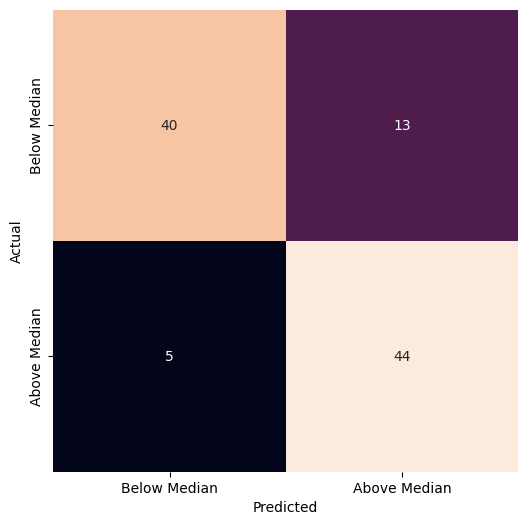

In [81]:
analysis(LogisticRegression(solver='lbfgs', max_iter=500)) 

# Linear Discriminant Analysis

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        53
           1       0.84      0.86      0.85        49

    accuracy                           0.85       102
   macro avg       0.85      0.85      0.85       102
weighted avg       0.85      0.85      0.85       102

Cross-Validation Scores: [0.85185185 0.81481481 0.79012346 0.82716049 0.8625    ]
Mean CV Accuracy: 0.8292901234567902


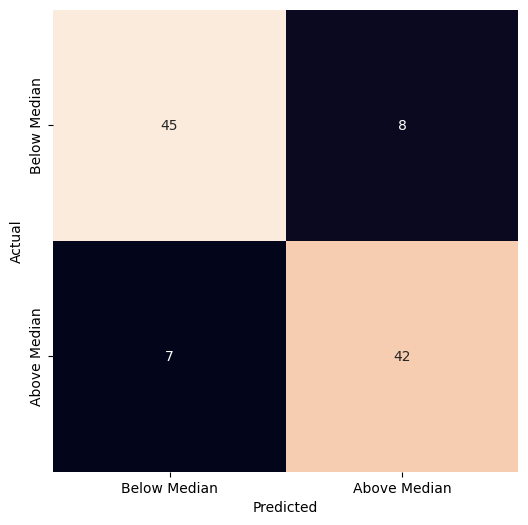

In [82]:
analysis(LinearDiscriminantAnalysis()) 

# Naive Bayes

              precision    recall  f1-score   support

           0       0.86      0.72      0.78        53
           1       0.74      0.88      0.80        49

    accuracy                           0.79       102
   macro avg       0.80      0.80      0.79       102
weighted avg       0.80      0.79      0.79       102

Cross-Validation Scores: [0.80246914 0.85185185 0.74074074 0.81481481 0.825     ]
Mean CV Accuracy: 0.8069753086419753


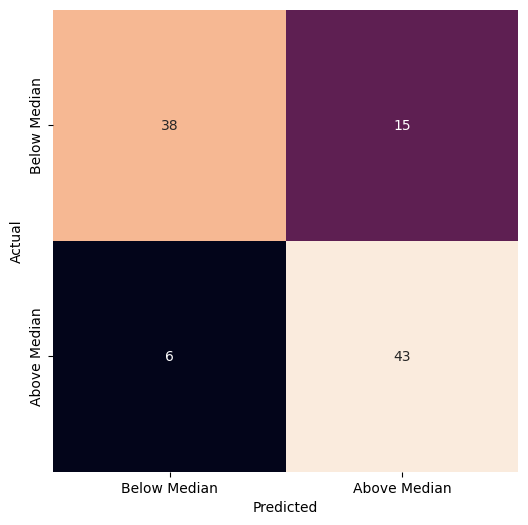

In [83]:
analysis(GaussianNB())


# KNN

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        53
           1       0.82      0.76      0.79        49

    accuracy                           0.80       102
   macro avg       0.81      0.80      0.80       102
weighted avg       0.81      0.80      0.80       102

Cross-Validation Scores: [0.80246914 0.79012346 0.80246914 0.79012346 0.75      ]
Mean CV Accuracy: 0.787037037037037


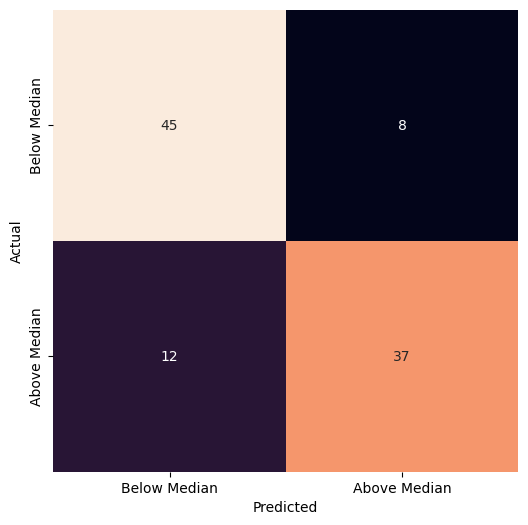

In [84]:
analysis(KNeighborsClassifier(n_neighbors=5))

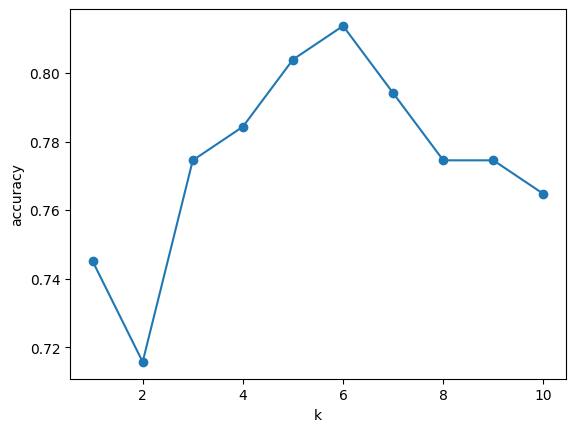

In [85]:
accuracies = []
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(range(1,11), accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        53
           1       0.86      0.73      0.79        49

    accuracy                           0.81       102
   macro avg       0.82      0.81      0.81       102
weighted avg       0.82      0.81      0.81       102

Cross-Validation Scores: [0.80246914 0.80246914 0.79012346 0.7654321  0.7625    ]
Mean CV Accuracy: 0.7845987654320987


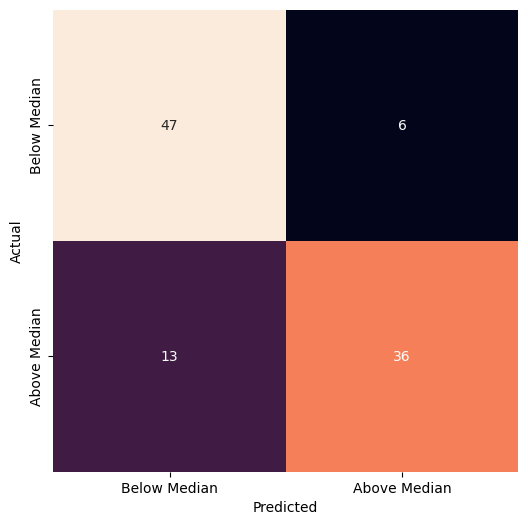

In [86]:
analysis(KNeighborsClassifier(n_neighbors=6))

Overall, the Linear Discriminant Analysis model fits the data best with respect to cross validation and a classification report

# Exercise 12

$a.) \hat{\beta}_0+\hat{\beta}_1x$

$b.) (\hat{\alpha}_{orange,0} - \hat{\alpha}_{apple,0}x) + (\hat{\alpha}_{orange,1} - \hat{\alpha}_{apple,1}x)$

c.) 

$\hat{\beta}_0=\hat{\alpha}_{orange,0} - \hat{\alpha}_{apple,0}x=2$

$\hat{\beta}_1=\hat{\alpha}_{orange,1} - \hat{\alpha}_{apple,1}x=-1$

d.)

$2=1.2-3x \rightarrow x=-0.27$

$-1=-2+.6x \rightarrow x=1.7$